In [58]:
# !pip install halomod
import numpy as np
from scipy import *
from pylab import *
import os
import pickle
import glob 
from scipy import special, optimize, integrate, stats
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

In [5]:
folder_HMF = '/pscratch/sd/j/jialiu/CAMELS/Rockstar/' ### original, unorganized halo catalogue from rockstar
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'
folder_plot = home+'plots/'

cmap = matplotlib.cm.get_cmap('Spectral') #('viridis')#
labels=[r'$\Omega_m$', r'$\sigma_8$', r'$\log_{10}(A_{\rm SN1})$', r'$\log_{10}(A_{\rm AGN1})$', r'$\log_{10}(A_{\rm SN2})$', r'$\log_{10}(A_{\rm AGN2})$']

mbins = linspace(8,16, 17)
dmbin = mbins[1]-mbins[0]
mbins_center = mbins[:-1]+0.5*dmbin


In [2]:
### sept 8, 2023 attempt
### step 1: test 1 halo term, using halo catalogue's Mvir, concentration, if measured Pk=Pk_halomod
### step 2: test halo model using binned Mvir and M-c relation
### step 3: either using step 1 or step 2 results, change Mvir and Cvir, reproduce Pk suppression

In [8]:
def cat_fn_gen (isim, iLH, ia, DM=''):
    rock_folder = folder_HMF+'%s%s/%s/%s/hlists/'%(isim, DM, iLH[:2], iLH)
    file_list = glob.glob(rock_folder+'hlist*')
    a_arr = np.array([float(x[-12:-5]) for x in file_list])
    diff_a = abs(ia-a_arr)
    a_match = a_arr[where(diff_a==amin(diff_a))]
    return rock_folder+'hlist_%.5f.list'%(a_match)

def cat_DM_fn_gen (isim, iLH, ia):
    return cat_fn_gen (isim, iLH, ia, DM='_DM')

cat_fn_gen ('IllustrisTNG', '1P_1_0', 0.99)
cat_DM_fn_gen ('IllustrisTNG', '1P_1_0', 0.99)

'/pscratch/sd/j/jialiu/CAMELS/Rockstar/IllustrisTNG_DM/1P/1P_1_0/hlists/hlist_1.00000.list'

In [9]:
# test_fn = '/global/homes/j/jialiu/cosmo_dep_feedback/CAMELS/Rockstar/Astrid/1P/1P_0/hlists/hlist_1.00000.list'
# hmf = np.loadtxt(test_fn, usecols=[1, 10, 11, 12, 17, 18, 19, 26, 47])
# # id(1), Mvir(10), Rvir(11), rs(12), x(17) y(18) z(19), Spin(26),c_to_a(47)

In [12]:
isim, iLH, iz = 'IllustrisTNG', '1P_1_0', 0
ia = 1/(1+iz)
cat_fn_1 = cat_fn_gen (isim, iLH, ia)
cat_fn_2 = cat_DM_fn_gen (isim, iLH, ia)

cat1_mvir = log10(np.loadtxt(cat_fn_1, usecols=[10]))
cat2_mvir = log10(np.loadtxt(cat_fn_2, usecols=[10]))

cat1_rvir = np.loadtxt(cat_fn_1, usecols=[11])
cat1_rs = np.loadtxt(cat_fn_1, usecols=[12])
cat1_cvir = cat1_rvir/cat1_rs


cat2_rvir = np.loadtxt(cat_fn_2, usecols=[11])
cat2_rs = np.loadtxt(cat_fn_2, usecols=[12])
cat2_cvir = cat2_rvir/cat2_rs

In [14]:
cat1_cvir

array([ 5.79701984,  5.69557617,  5.81094061, ...,  7.34957369,
       14.60493827,  5.42752101])

In [ ]:
########### below are halomod  ##############

In [25]:
import halomod
from halomod import HaloModel, DMHaloModel
##The :class:`HaloModel` class is provided as an alias of :class:`TracerHaloModel`.
# from halomod.cross_correlations import CrossCorrelations,_HODCross, ConstantCorr
from halomod import TracerHaloModel
from halomod.concentration import CMRelation
from hmf.halos.mass_definitions import SOCritical, FOF
print(f"Using halomod v{halomod.__version__}")

Using halomod v2.1.0


In [42]:
# hm = HaloModel(halo_profile_model="NFW")
hm = DMHaloModel(halo_profile_model="NFW") 
hm_NFWInf = DMHaloModel(halo_profile_model="NFWInf") 
## check the fileds https://github.com/halomod/halomod/blob/dev/src/halomod/halo_model.py

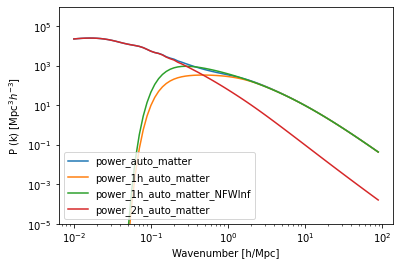

In [44]:
# plt.plot(hm.k, hm.nonlinear_power, label='Halofit')
plt.plot(hm.k_hm, hm.power_auto_matter, label='power_auto_matter')
plt.plot(hm.k_hm, hm.power_1h_auto_matter, label='power_1h_auto_matter')
plt.plot(hm_NFWInf.k_hm, hm_NFWInf.power_1h_auto_matter, label='power_1h_auto_matter_NFWInf')
plt.plot(hm.k_hm, hm.power_2h_auto_matter, label='power_2h_auto_matter')

### "This method is deprecated in favour of power_2h_auto_matter"
# plt.plot(hm.k_hm, hm.power_mm, label='power_mm')
# plt.plot(hm.k_hm, hm.power_mm_1h, label='power_mm_1h')
# plt.plot(hm.k_hm, hm.power_mm_2h, label='power_mm_2h')

plt.xscale('log')
plt.yscale('log')

plt.ylim(1e-5,1e6)
plt.legend()
plt.xlabel("Wavenumber [h/Mpc]")
plt.ylabel(r"P (k) [${\rm Mpc^3} h^{-3}$]");

In [37]:
# !pip install pathos
# !pip install classylss
import classylss
import classylss.binding as CLASS

In [65]:
###### give up using manu's package due to install error (print etc..)
# !git clone git@github.com:EmmanuelSchaan/HaloGen.git
# cd python driver.py

In [66]:
class_params = { 'output': 'dTk vTk mPk',#'lCl tCl pCl mPk',
                  #'l_max_scalars': 2000,
                  #'lensing': 'yes',
                  'A_s': 2.3e-9,
                  'n_s': 0.9624,
                  'h': 0.6711,
                  'N_ur': 3.046,
                  'omega_b': 0.022068,
                  'Omega_cdm': 0.32,
                  'Omega_k': 0.,
                  'P_k_max_1/Mpc': 10.,
                  #'N_ncdm': 3,
                  #'m_ncdm': str(self.nuMasses[0])+','+str(self.nuMasses[1])+','+str(self.nuMasses[2]),
                  #'deg_ncdm': '1, 1, 1',
                  'non linear': 'halofit',
                  'z_max_pk': 100.
                  }

engine = CLASS.ClassEngine(class_params)
bg = CLASS.Background(engine)
sp = CLASS.Spectra(engine)

In [67]:
### NFW profile infinite (no truncation in r) has an analytic form
# _p: The reduced dimensionless fourier-transform of the halo_profile

## copy Manu's code from https://github.com/EmmanuelSchaan/HaloGen/blob/master/profile.py#L189C1-L203C20

rho_crit = lambda z: bg.rho_crit(z)/(1.+z)**3 * 1.e10
rho_m = lambda z: bg.rho_m(z)/(1.+z)**3 * 1.e10

def Si(x):
    return special.sici(x)[0]

def Ci(x):
    return special.sici(x)[1]

def deltaCrit(z):
    """ratio of virialized density to critical density at collapse (dimless).
    from Bullock et al 2001, from Bryan & Norman 1998
    usual 18*pi**2 if OmM=1.
    Omega = rho_matter(z)/rhocrit(z).
    """
    #f = bg.Omega0_m * (1.+z)**3 / ( bg.Omega0_m * (1.+z)**3 + (1. - bg.Omega0_m) )
    f = bg.Omega_m(z)
    return 18.*np.pi**2 + 82.*(f-1.) - 39.*(f-1.)**2

def rVir(m, z):
    """Comoving virial and scale radii (Mpc/h)
    input mass is mvir (Msun/h)
    """
    Rvir = ( 3.*m / (4*np.pi*rho_crit(z)*deltaCrit(z)) )**(1./3.)  # in h^-1 Mpc
    return Rvir

def deltaC(z):
    """critical density for spherical collapse at redshift z
    from Henry 2000, from Nakamura & Suto 1997
    usual 3.*(12.*pi)**(2./3.) / 20. = 1.686 if OmM=1.
    """
    x = ( 1./bg.Omega0_m - 1. )**(1./3.)
    x /= 1.+z
    dc = 3.*(12.*np.pi)**(2./3.) / 20.
    dc *= 1. - 0.0123* np.log( 1. + x**3 )
    return dc

def W3d_sth(x):
    """Fourier transform of a 3d spherical top hat window function.
    Use x = k*R as input,
    where R is the tophat radius and k the wave vector.
    Input and output are dimensionless.
    """
    if x < 1.e-3:  # for small x, replace by expansion, for numerical stability
        f = 1. - 0.1* x**2 + 0.00357143* x**4
    else:
        f = (3./(x**3)) * ( np.sin(x) - x * np.cos(x) )
    return f

def Sigma2(R, z, W3d,kMin=1.e-3, kMax=1.e2):
    """variance of delta on an isotropic 3d domain,
    defined by W3d
    R in h^-1 Mpc, comoving scale, output is dimless
    """
    f = lambda lnk: np.exp(lnk)**3 * sp.get_pklin(np.exp(lnk), z) * W3d(np.exp(lnk)*R)**2 / (2* np.pi**2) # dimensionless
    result = integrate.quad(f, np.log(kMin), np.log(kMax), epsabs=0., epsrel=1.e-3)[0]
    return result

def nonLinMass(z):
    """nonlin mass at z, in Msun/h
    from Takada and Jain 2002/2003
    """
    # bounds for looking for m_nonlinin, in (h^-1 solarM) (h^-1 Mpc)^-3
    ma = 1.e11
    mb = 1.e13
    # solve for sigma(m)^2 = deltaC**2
    R = lambda m: ( 3.* m / (4*np.pi*rho_m(z)) )**(1./3.)   # in h^-1 Mpc
    f = lambda m: Sigma2(R(m), z, W3d_sth) - deltaC(z)**2
    # find mass such that nu(m, z) = 1
    result = optimize.brentq(f , ma, mb)
    return result

def rS_rhoS_c(m, z):
    """comoving scale radius for NFW profile
    in Mpc/h
    """
    Rvir = rVir(m, z)
    # concentration parameter
    #c = 10./(1.+z) * (m / m_nonlin)**(-0.2)   # from Takada & Jain 2002
    m_nonlin = nonLinMass(z)
    c = 9./(1.+z) * (m / m_nonlin)**(-0.13) # Takada & Jain 2003
    # scale radius
    RS = Rvir / c  # in Mpc/h
    # normalize the mass within rVir to be mVir
    rhoS = m / (4.*np.pi*RS**3)
    rhoS /= np.log(1.+c) - c/(1.+c)  # (Msun/h) / (Mpc/h)^3
    return RS, rhoS, c

In [109]:
for iz in (0,1,2):
    m_nonlin=nonLinMass(iz)
    print (iz, m_nonlin)

0 1.0339757656912846e-12
1 1.0339757656912846e-12
2 1.0339757656912846e-12


In [103]:
######## previous cell is from theory calculation for c, RS, rhoS
######## to do: modify to take measured c, Rs, rhoS

def nfw(k, m, z):
    """Fourier transform of NFW density profile,
    normalized such that u(k=0, m, z) = 1
    ie rhoNFW(k,m,z) = m * nfw(k,m,z)
    truncation radius is taken to be infinite (unphysical)
    k in h Mpc^-1
    m in h^-1 solarM
    """
    RS, rhoS, c = rS_rhoS_c(m, z) ## JL TO DO: replace this with actual numbers from the sims
    print (log10(m), log10(RS), log10(rhoS), c)
    #
    result = np.sin(k * RS) * (  Si((1+c) * k * RS) - Si(k * RS)  )
    result += - np.sin(c * k * RS) / ((1+c) * k * RS)
    result += np.cos(k * RS) * (  Ci((1+c) * k * RS) - Ci(k * RS)  )
    result /= (np.log(1+c) - c/(1+c))
    return result

In [104]:
k=logspace(-2, 1, 16)
out=[]
m_arr=logspace(10, 15, 6)
for im in m_arr:
    # print (log10(im))
    nfw_k = nfw (k, im, 0)
    out.append(nfw_k)

10.0 0.5344278045135555 11.413463245422983 0.012477536708641851
11.0 0.997761137846889 11.281612571508866 0.009249725748324346
12.0 1.4610944711802223 11.150237142797149 0.006856916426457631
13.0 1.9244278045135557 11.019215588128738 0.005083102370677531
14.0 2.387761137846889 10.888457231964804 0.0037681558449642267
15.0 2.851094471180222 10.757894466777799 0.0027933725186898932


In [ ]:
### ^ concentration looks too small

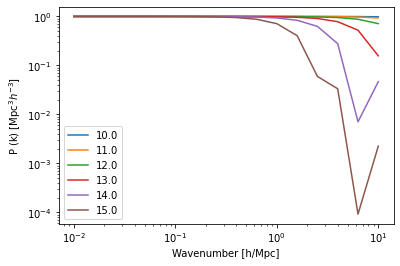

In [105]:
i=0
for nfw_k in out:
    plt.plot(k, nfw_k, label=log10(m_arr[i]))
    i+=1

plt.xscale('log')
plt.yscale('log')

# plt.ylim(1e-5,1e6)
plt.legend()
plt.xlabel("Wavenumber [h/Mpc]")
plt.ylabel(r"P (k) [${\rm Mpc^3} h^{-3}$]");

In [ ]:
# TO DO: ## nonlinear mass correct it, get correct concentration
    # https://github.com/halomod/halomod/blob/dev/src/halomod/concentration.py#L139C1-L166C37

In [ ]:
def nfw_flex (k, m, RS, rvir, z):
    
    result = np.sin(k * RS) * (  Si((1+c) * k * RS) - Si(k * RS)  )
    result += - np.sin(c * k * RS) / ((1+c) * k * RS)
    result += np.cos(k * RS) * (  Ci((1+c) * k * RS) - Ci(k * RS)  )
    result /= (np.log(1+c) - c/(1+c))
    return result

In [15]:
### most code in https://github.com/halomod/halomod/blob/dev/src/halomod/halo_model.py
# help(hm)          # Lists many of the available quantities.
# hm.quantities_available()

# def power_1h_auto_matter_fnc(self):
#     """A callable returning the halo model 1-halo DM auto-power spectrum."""
#     p = self._do_1halo_integral(
#         max_mmin=self.m[0],
#         integrand=self.dndm * self.m ** 2 * self.halo_profile_ukm ** 2,
#         mean_dens=self.mean_density0,
#     )

In [62]:
### now try to hack dndm and halo_profile_ukm; 
### following https://halomod.readthedocs.io/en/latest/examples/getting_started.html#Defining-Your-Own-Models
### https://halomod.readthedocs.io/en/latest/examples/component-showcase.html

In [22]:
print (hm.dndm[:10])
print (hm.m[:10])

[4.40494237e+08 4.24811888e+08 4.09646140e+08 3.94980922e+08
 3.80800653e+08 3.67090230e+08 3.53835011e+08 3.41020805e+08
 3.28633852e+08 3.16660816e+08]
[1.         1.02329299 1.04712855 1.07151931 1.0964782  1.12201845
 1.14815362 1.17489755 1.20226443 1.23026877]


In [23]:
## 'SphericalOverdensity', 'SOGeneric', 'SOMean', 'SOCritical', 'SOVirial', 'FOF'
# hm.mdef_model = 'FOF' 
hm.mdef_model = 'SOCritical'

In [24]:
class ConstantConcentration(CMRelation):
    native_mdefs = (SOCritical(),)
    # native_mdefs = (FOF(),)
    _defaults = {"amplitude": 3}

    def cm(self, m, z=0):
        return self.params['amplitude'] * np.ones_like(m)

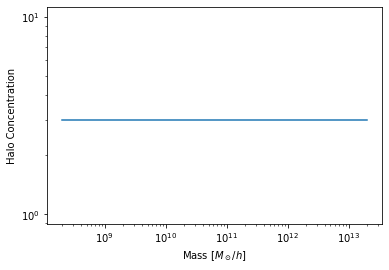

In [61]:
hm.halo_concentration_model = ConstantConcentration
plt.plot(hm.m, hm.cmz_relation)
plt.xscale('log')
plt.yscale('log')

plt.xlabel("Mass [$M_\odot/h$]")
plt.ylabel("Halo Concentration");

In [65]:
### to do (Aug 8)
### (1) customize dndm, c
### (2) check if Pk matches the observed curve, then Pk/h; HMF, etc
### (3) maybe it is easier to do the integration myself?? for 1halo term only
#### https://halomod.readthedocs.io/en/latest/examples/component-showcase.html
### https://github.com/halomod/hmf/blob/dev/src/hmf/mass_function/hmf.py

In [ ]:
def _do_1halo_integral(self, max_mmin, integrand, mean_dens):
    """Do the 1-halo integral for some quantity, doing the turnover trick."""

    dens_min = 4 * np.pi * self.mean_density0 * self.halo_overdensity_mean / 3
    p = np.zeros_like(self.k)
    for i, (k, integ) in enumerate(zip(self.k, integrand)):
        if self.force_1halo_turnover:
            r = np.pi / k / 10  # The 10 is a complete heuristic hack.
            mmin = max(max_mmin, dens_min * r ** 3)
        else:
            mmin = max_mmin

        p[i] = tools.spline_integral(self.m, integ, xmin=mmin)

    return p / mean_dens ** 2

p = self._do_1halo_integral(
            max_mmin=self.m[0],
            integrand=self.dndm * self.m ** 2 * self.halo_profile_ukm ** 2,
            mean_dens=self.mean_density0,
        )

# def m(self):
#     return 10 ** np.arange(self.mmin, self.Mmax, self.dlog10m)

    def halo_overdensity_mean(self, z=0, cosmo=Planck15):
        return self.halo_density(z, cosmo) / self.mean_density(z, cosmo)
    
    def mean_density(cls, z=0, cosmo=Planck15):
        """Get the mean density of the Universe at redshift z, [h^2 Msun / Mpc^3]."""
        return cosmo.Om(z) * cls.critical_density(z, cosmo)